# NBA Shot Selection

**Objective:**
This report analyzes a dataset containing information on basketball shots. The goal is to build a model that predicts whether a player will score or not based on the circumstances of the shot.

**Building the Shot Prediction Model**
The chosen model with the highest accuracy and F1-score will be used to predict future shot outcomes. This model can be integrated into various applications, such as:

Real-time game analysis: Provide insights during games about the likelihood of shots being made.

Scouting and player evaluation: Analyze historical shot data to assess player performance and potential.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
shot_df = pd.read_csv("data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
print(shot_df.shape)

shot_df.head()

(30697, 25)


action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
0    167     72 -118.1028                 10       1         0  2000-01   
1   -157      0 -118.4268                 10       1         0  2000-01   
2   -101    135 -118.3708                  7       1         0  2000-01   
3    138    175 -118.1318                  6       1         0  2000-01   
4      0      0 -118.2698                  6       2         0  2000-01   

   seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                 27             18             NaN  2PT Field Goal   
1                 22             15             0.0  2PT Field Goal   
2                 45             16             1.0  2PT Field Goal   
3                 52             22             0.0  2PT Field Goal   
4                 19              0             1.0  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5

In [5]:
shot_df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [6]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [7]:
shot_df.describe()

game_event_id       game_id           lat         loc_x         loc_y  \
count   30697.000000  3.069700e+04  30697.000000  30697.000000  30697.000000   
mean      249.190800  2.476407e+07     33.953192      7.110499     91.107535   
std       150.003712  7.755175e+06      0.087791    110.124578     87.791361   
min         2.000000  2.000001e+07     33.253300   -250.000000    -44.000000   
25%       110.000000  2.050008e+07     33.884300    -68.000000      4.000000   
50%       253.000000  2.090035e+07     33.970300      0.000000     74.000000   
75%       368.000000  2.960047e+07     34.040300     95.000000    160.000000   
max       659.000000  4.990009e+07     34.088300    248.000000    791.000000   

                lon  minutes_remaining        period      playoffs  \
count  30697.000000       30697.000000  30697.000000  30697.000000   
mean    -118.262690           4.885624      2.519432      0.146562   
std        0.110125           3.449897      1.153665      0.353674   
min     -118.519800           0.000000      1.000000      0.000000   
25%     -118.337800           2.000000      1.000000      0.000000   
50%     -118.269800           5.000000      3.000000      0.000000   
75%     -118.174800           8.000000      3.000000      0.000000   
max     -118.021800          11.000000      7.000000      1.000000   

       seconds_remaining  shot_distance  shot_made_flag       team_id  \
count       30697.000000   30697.000000    25697.000000  3.069700e+04   
mean           28.365085      13.437437        0.446161  1.610613e+09   
std            17.478949       9.374189        0.497103  0.000000e+00   
min             0.000000       0.000000        0.000000  1.610613e+09   
25%            13.000000       5.000000        0.000000  1.610613e+09   
50%            28.000000      15.000000        0.000000  1.610613e+09   
75%            43.000000      21.000000        1.000000  1.610613e+09   
max            59.000000      79.000000        1.000000  1.610613e+09   

            shot_id  
count  30697.000000  
mean   15349.000000  
std     8861.604943  
min        1.000000  
25%     7675.000000  
50%    15349.000000  
75%    23023.000000  
max    30697.000000

In [8]:
shot_df.nunique()

action_type              57
combined_shot_type        6
game_event_id           620
game_id                1559
lat                     457
loc_x                   489
loc_y                   457
lon                     489
minutes_remaining        12
period                    7
playoffs                  2
season                   20
seconds_remaining        60
shot_distance            74
shot_made_flag            2
shot_type                 2
shot_zone_area            6
shot_zone_basic           7
shot_zone_range           5
team_id                   1
team_name                 1
game_date              1559
matchup                  74
opponent                 33
shot_id               30697
dtype: int64

In [9]:
shot_df.describe(include='object')

action_type combined_shot_type   season       shot_type shot_zone_area  \
count        30697              30697    30697           30697          30697   
unique          57                  6       20               2              6   
top      Jump Shot          Jump Shot  2005-06  2PT Field Goal      Center(C)   
freq         18880              23485     2318           24271          13455   

       shot_zone_basic  shot_zone_range           team_name   game_date  \
count            30697            30697               30697       30697   
unique               7                5                   1        1559   
top          Mid-Range  Less Than 8 ft.  Los Angeles Lakers  2016-04-13   
freq             12625             9398               30697          50   

          matchup opponent  
count       30697    30697  
unique         74       33  
top     LAL @ SAS      SAS  
freq         1020     1978

# Exploratory Data Analysis

> ### Univariate Analysis - Categorical Data

In [10]:
categorical_df = shot_df.select_dtypes(include=['object'])

categorical_df.columns

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'game_date', 'matchup', 'opponent'],
      dtype='object')

In [11]:
def categorical_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [12]:
categorical_univariate_analysis(categorical_df)

********** action_type **********
count                                                  30697
nunique                                                   57
unique     [Jump Shot, Driving Dunk Shot, Layup Shot, Run...
Name: action_type, dtype: object
Value Counts: 
 action_type
Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot

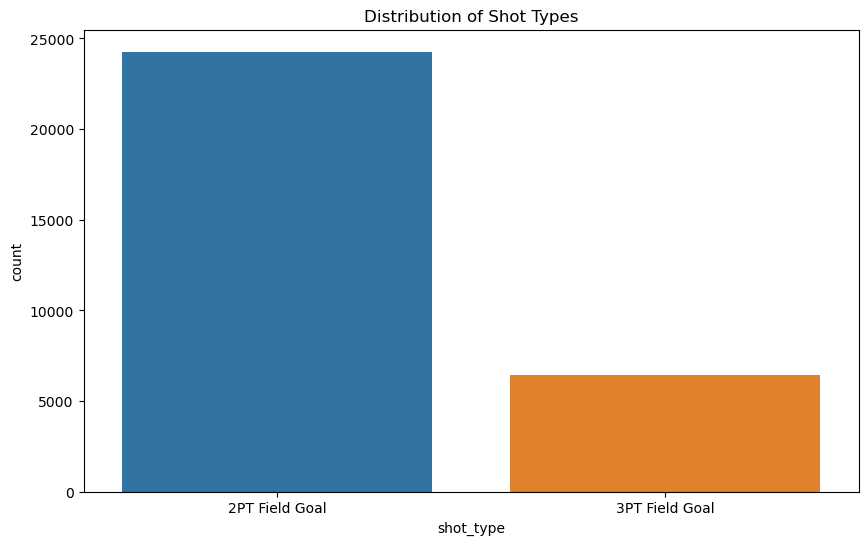

In [13]:
# Distribution of shot types
plt.figure(figsize=(10, 6))
sns.countplot(x='shot_type', data=categorical_df)
plt.title('Distribution of Shot Types')
plt.show()

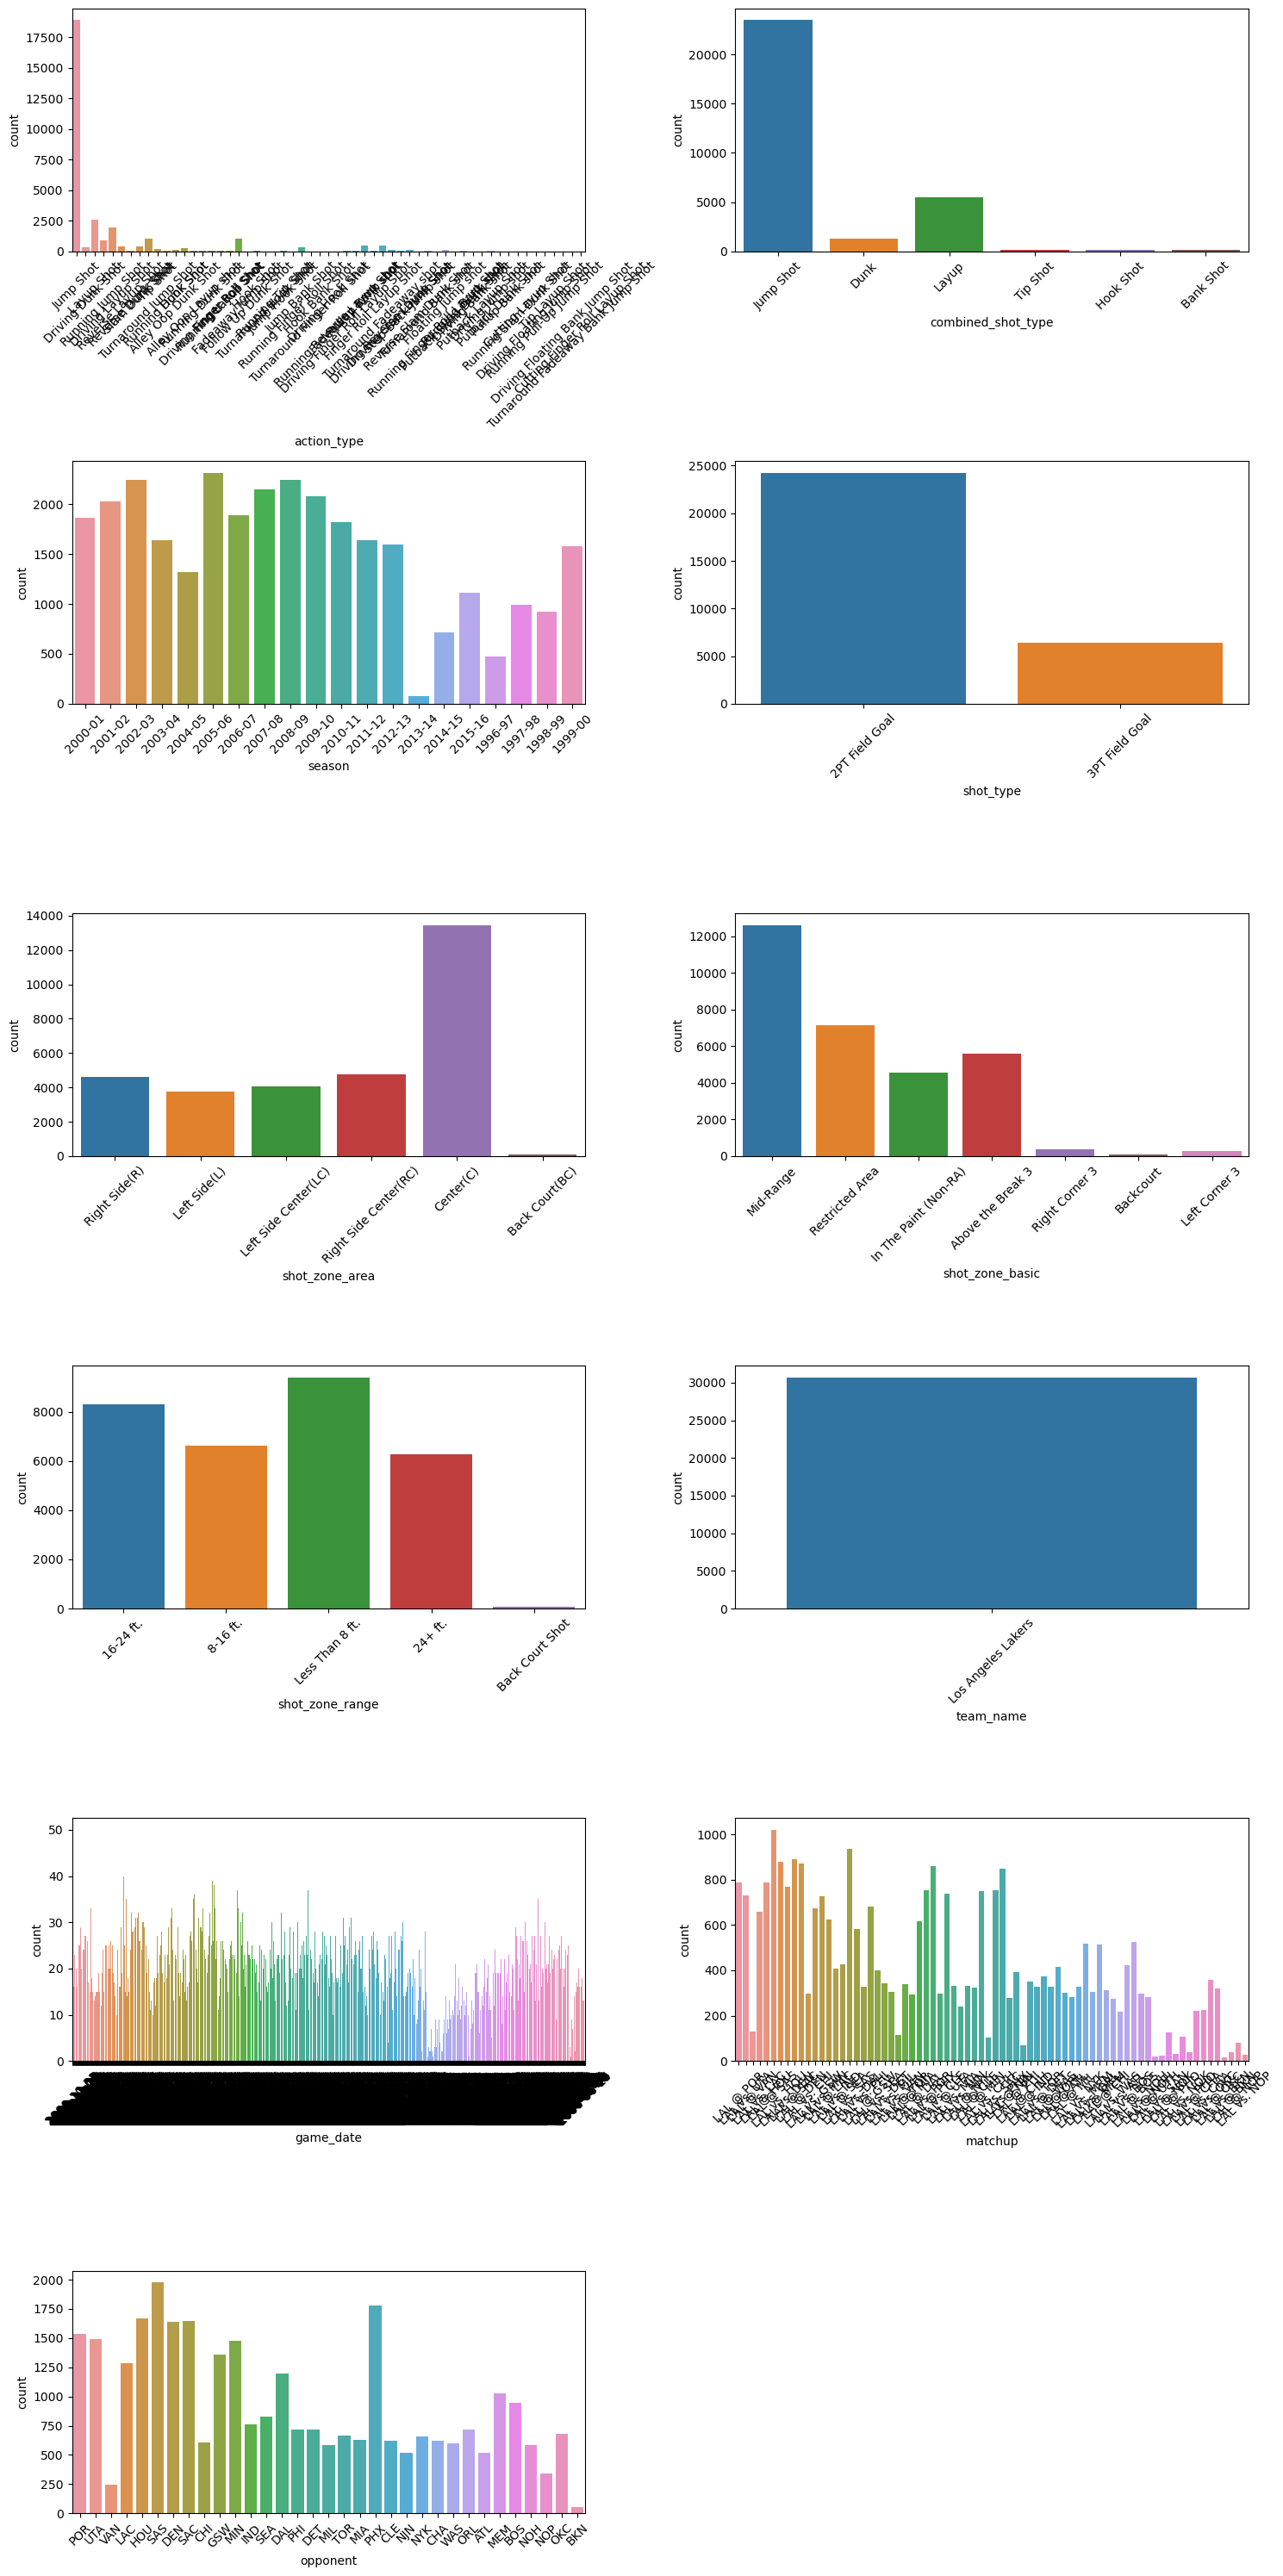

In [14]:
# Set up the subplot grid
num_plots = len(categorical_df.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols
plt.figure(figsize=(15, 5*num_rows))

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=categorical_df, x=col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> ### Univariate Analysis - Numerical Data

In [15]:
numerical_df = shot_df.select_dtypes(include=['int64', 'float64'])

numerical_df.columns

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'team_id', 'shot_id'],
      dtype='object')

In [16]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [17]:
numerical_univariate_analysis(numerical_df)

********** game_event_id **********
min         2.000000
max       659.000000
mean      249.190800
median    253.000000
std       150.003712
Name: game_event_id, dtype: float64

********** game_id **********
min       2.000001e+07
max       4.990009e+07
mean      2.476407e+07
median    2.090035e+07
std       7.755175e+06
Name: game_id, dtype: float64

********** lat **********
min       33.253300
max       34.088300
mean      33.953192
median    33.970300
std        0.087791
Name: lat, dtype: float64

********** loc_x **********
min      -250.000000
max       248.000000
mean        7.110499
median      0.000000
std       110.124578
Name: loc_x, dtype: float64

********** loc_y **********
min       -44.000000
max       791.000000
mean       91.107535
median     74.000000
std        87.791361
Name: loc_y, dtype: float64

********** lon **********
min      -118.519800
max      -118.021800
mean     -118.262690
median   -118.269800
std         0.110125
Name: lon, dtype: float64

********** 

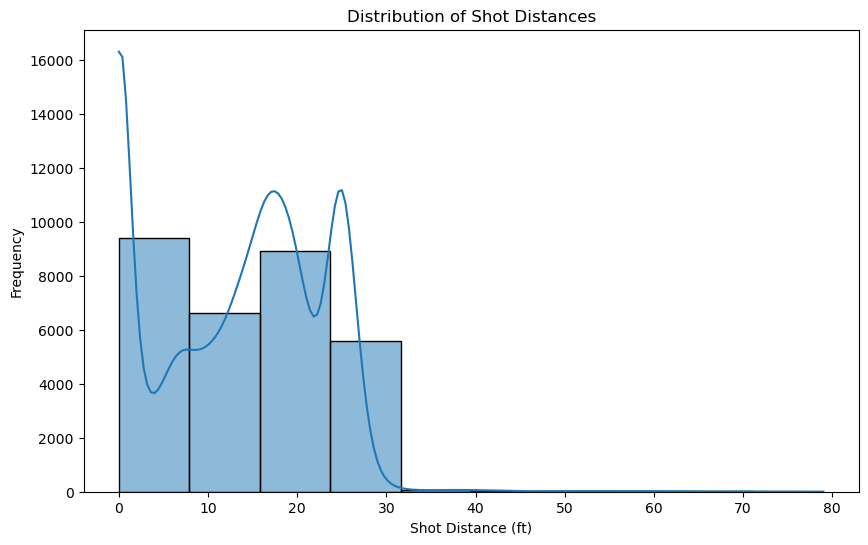

In [18]:
# Distribution of shot distances
plt.figure(figsize=(10, 6))
sns.histplot(numerical_df['shot_distance'], bins=10, kde=True)
plt.title('Distribution of Shot Distances')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Frequency')
plt.show()

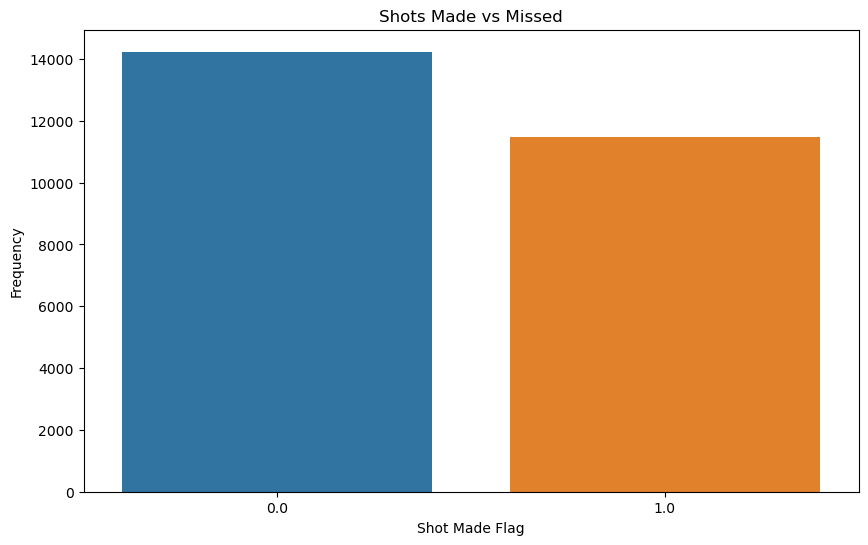

In [19]:
# Distribution of shots made vs missed
plt.figure(figsize=(10, 6))
sns.countplot(x='shot_made_flag', data=numerical_df)
plt.title('Shots Made vs Missed')
plt.xlabel('Shot Made Flag')
plt.ylabel('Frequency')
plt.show()

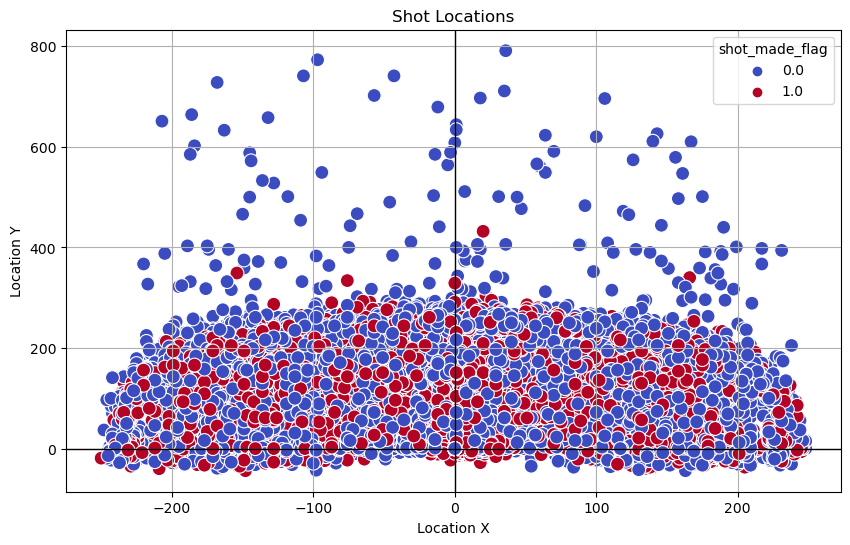

In [20]:
# Shot locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loc_x', y='loc_y', hue='shot_made_flag', data=numerical_df, palette='coolwarm', s=100)
plt.title('Shot Locations')
plt.xlabel('Location X')
plt.ylabel('Location Y')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

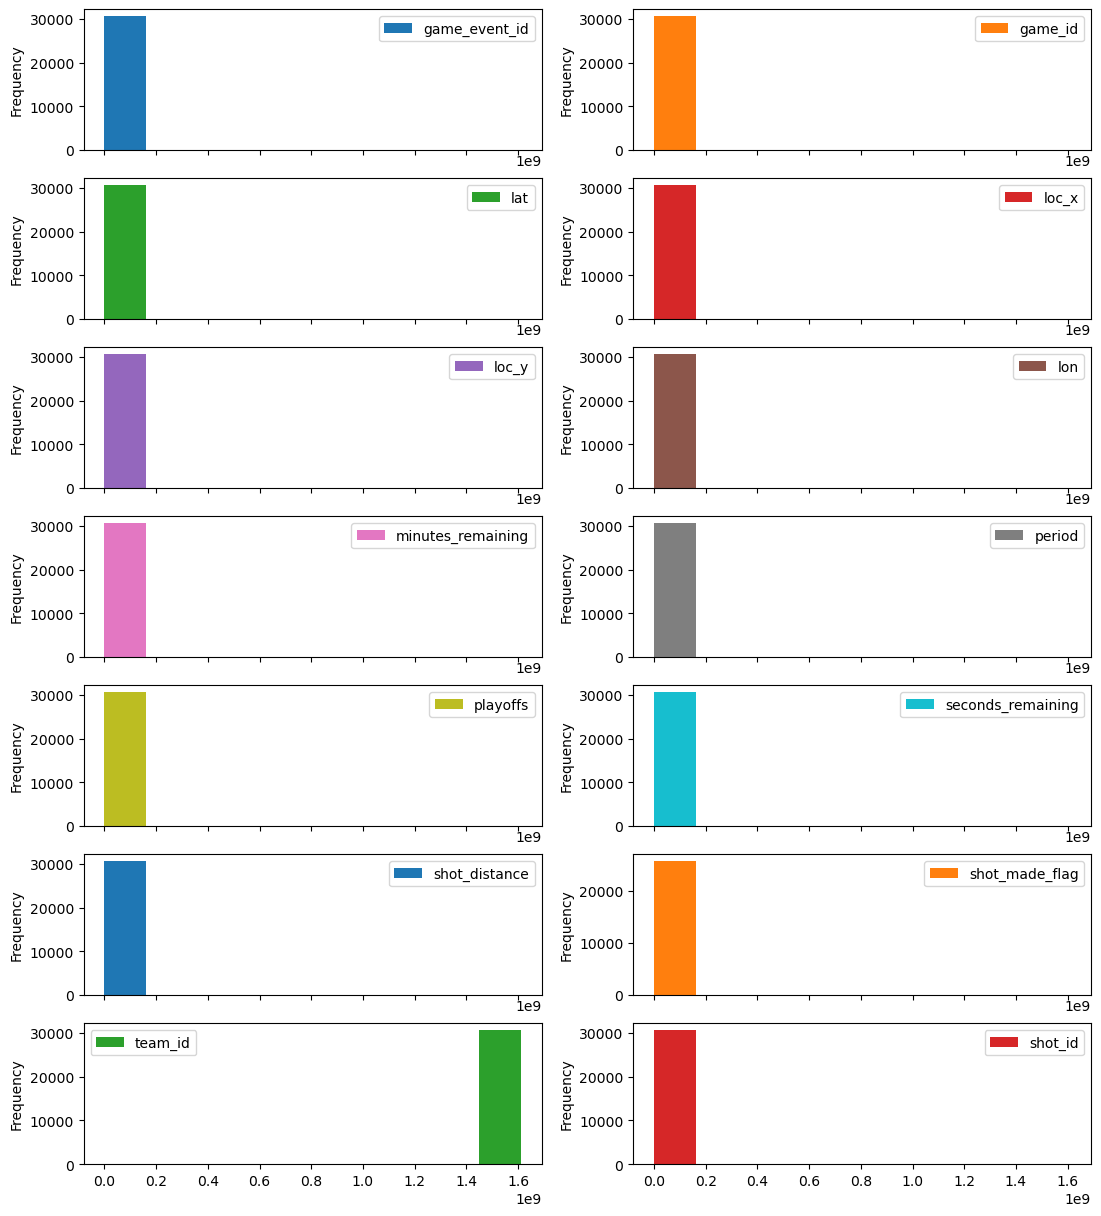

In [21]:
numerical_df.plot(kind='hist', subplots=True, layout=(7, 2), figsize=(13, 15))

game_event_id           Axes(0.125,0.786098;0.352273x0.0939024)
game_id              Axes(0.547727,0.786098;0.352273x0.0939024)
lat                     Axes(0.125,0.673415;0.352273x0.0939024)
loc_x                Axes(0.547727,0.673415;0.352273x0.0939024)
loc_y                   Axes(0.125,0.560732;0.352273x0.0939024)
lon                  Axes(0.547727,0.560732;0.352273x0.0939024)
minutes_remaining       Axes(0.125,0.448049;0.352273x0.0939024)
period               Axes(0.547727,0.448049;0.352273x0.0939024)
playoffs                Axes(0.125,0.335366;0.352273x0.0939024)
seconds_remaining    Axes(0.547727,0.335366;0.352273x0.0939024)
shot_distance           Axes(0.125,0.222683;0.352273x0.0939024)
shot_made_flag       Axes(0.547727,0.222683;0.352273x0.0939024)
team_id                     Axes(0.125,0.11;0.352273x0.0939024)
shot_id                  Axes(0.547727,0.11;0.352273x0.0939024)
dtype: object

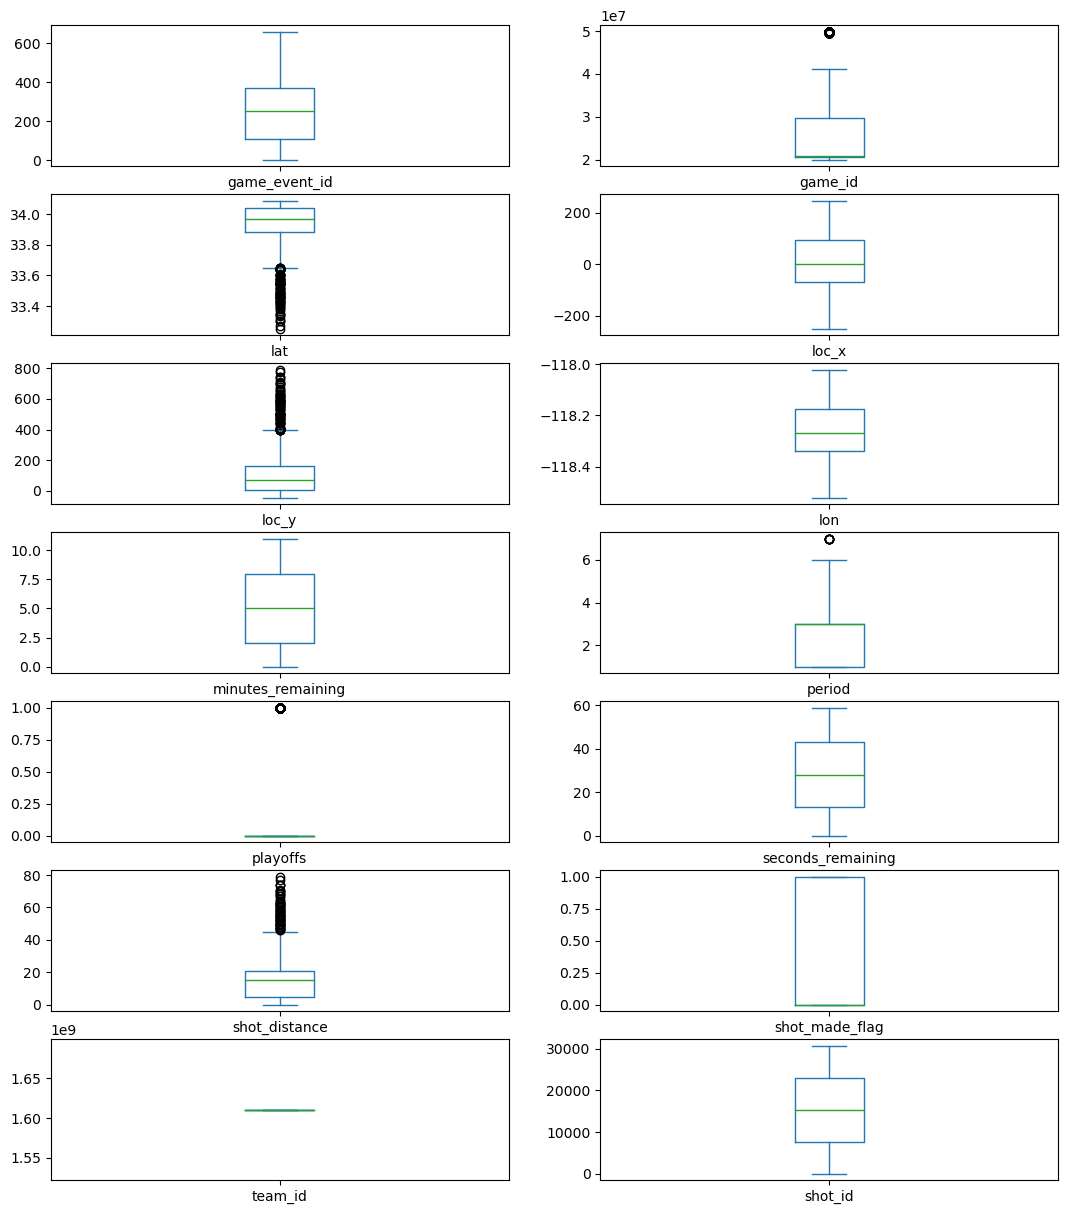

In [22]:
numerical_df.plot(kind='box', subplots=True, layout=(7, 2), figsize=(13, 15))

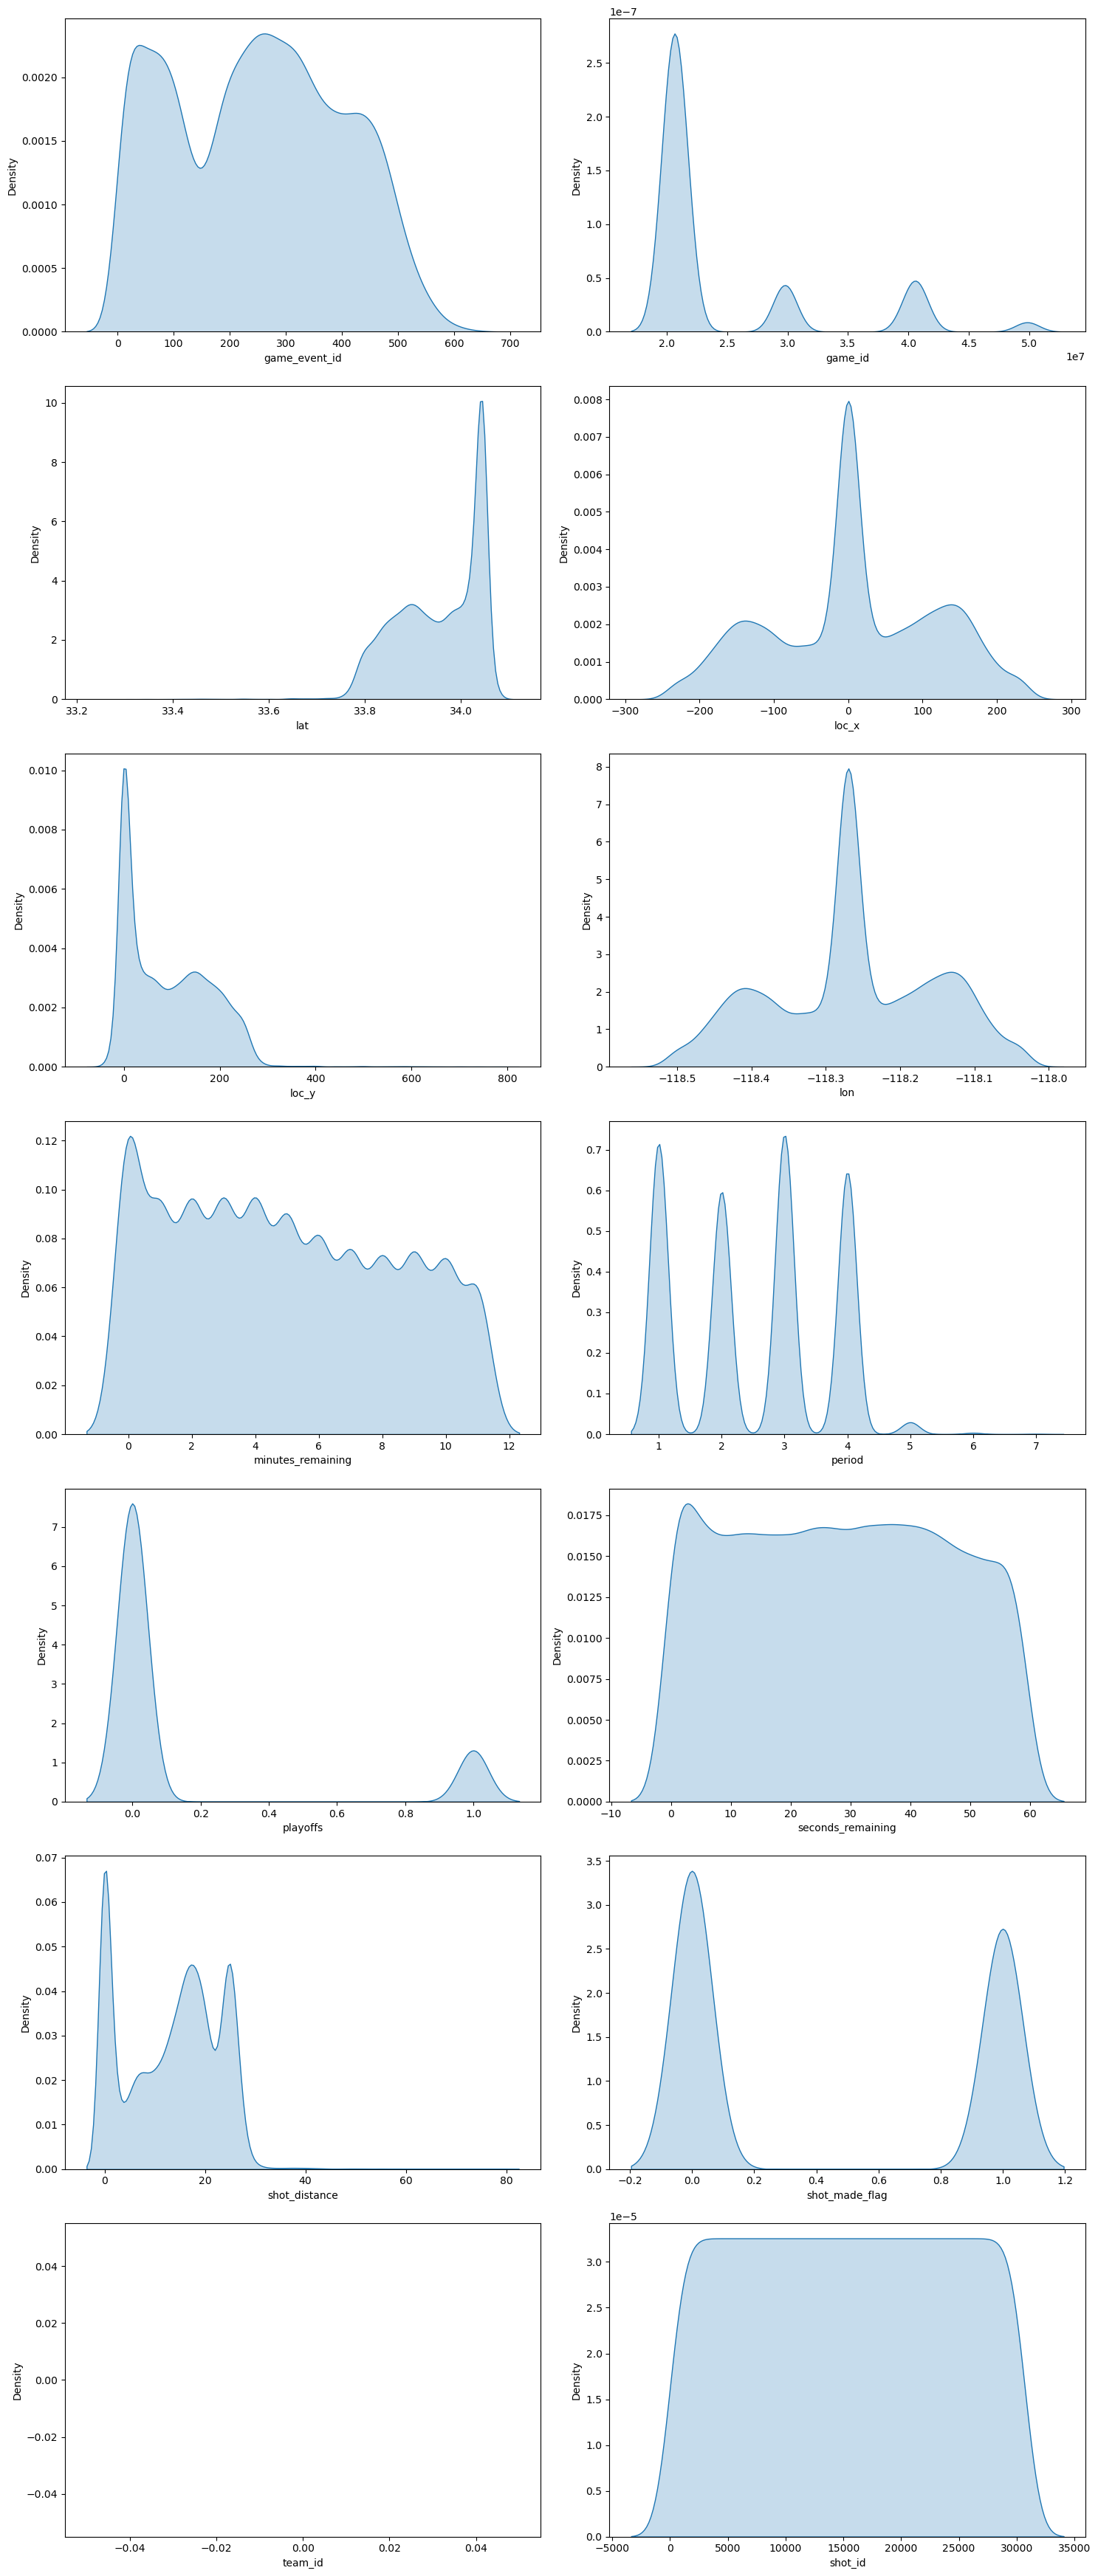

In [23]:
# Set up the subplot grid
num_plots = len(numerical_df.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols
plt.figure(figsize=(15, 5*num_rows))

# Loop through each categorical column and create a countplot
for i, col in enumerate(numerical_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=numerical_df, x=col, shade=True)

plt.tight_layout()
plt.show()

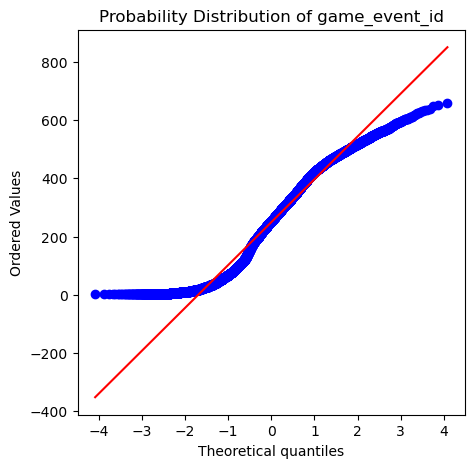

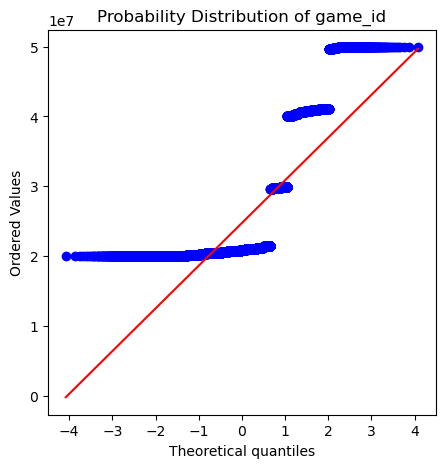

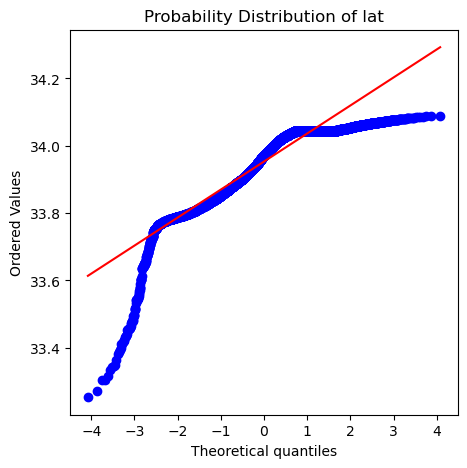

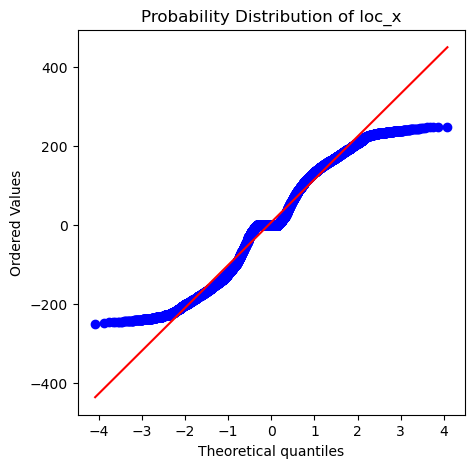

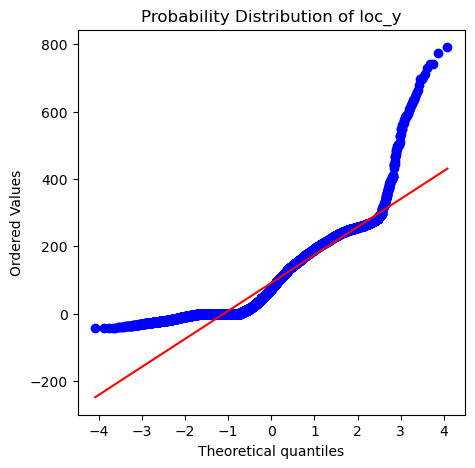

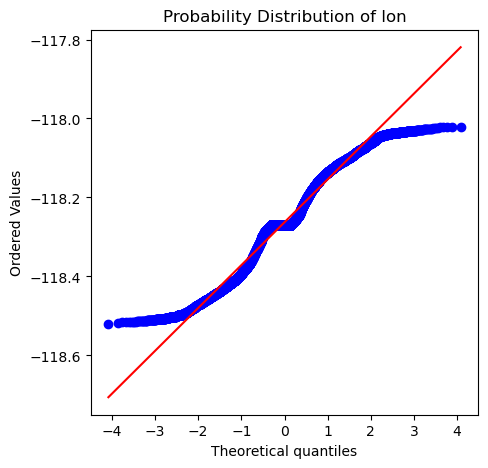

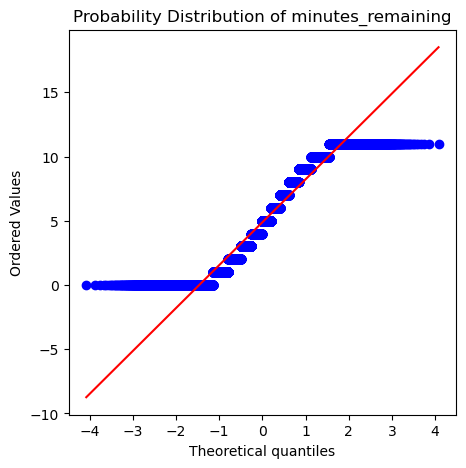

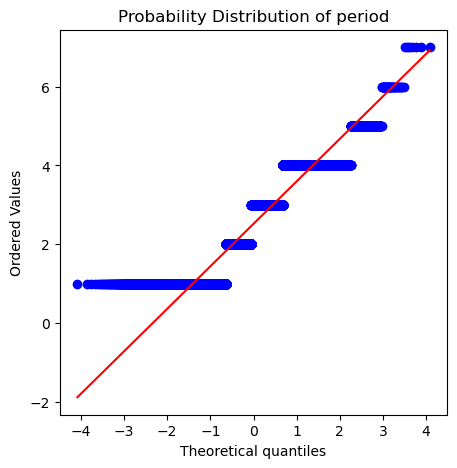

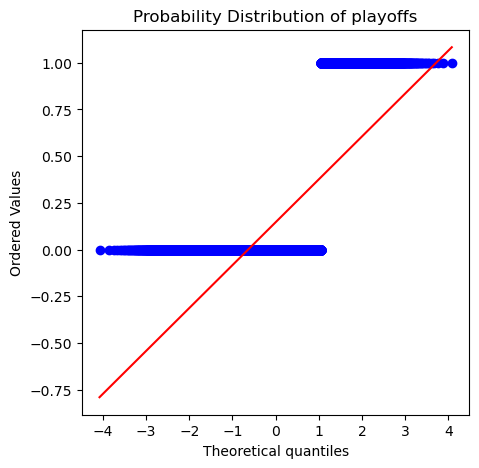

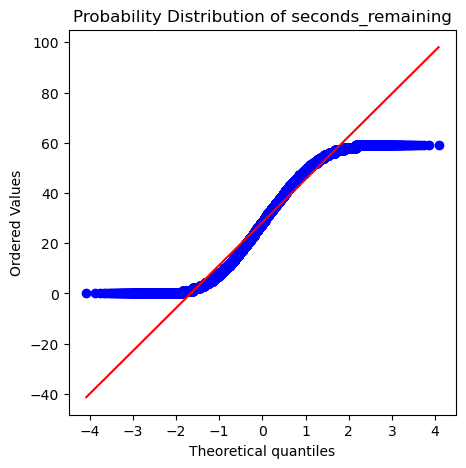

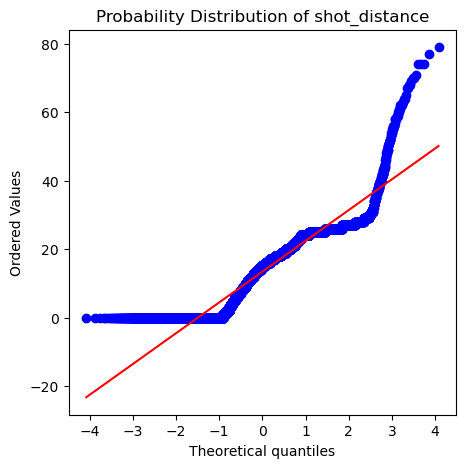

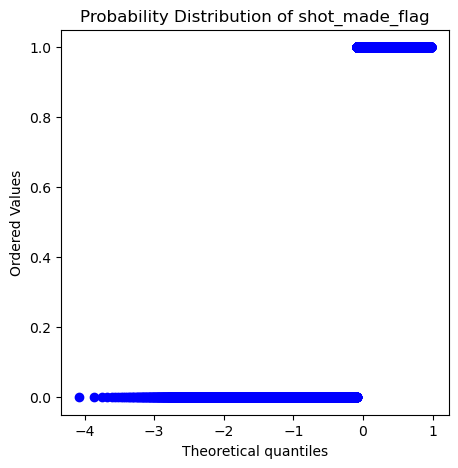

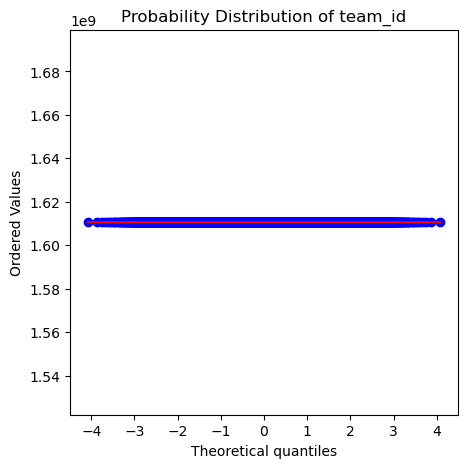

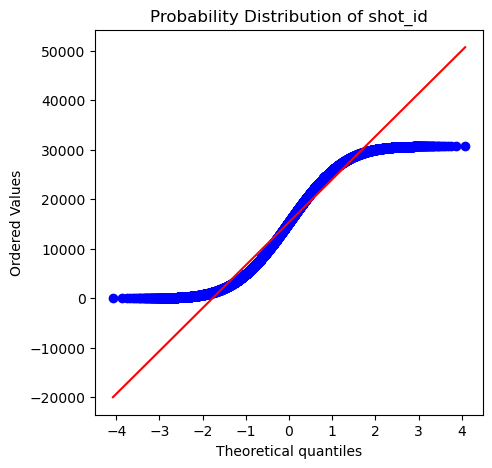

In [24]:
from scipy import stats

numerical_columns = numerical_df.select_dtypes(include=['int', 'float']).columns

for column in numerical_columns:
    # Calculate the probability distribution
    probability_distribution = numerical_df[column].value_counts(normalize=True)
    
    # Plot the probability distribution using probplot
    plt.figure(figsize=(5, 5))
    stats.probplot(numerical_df[column], dist="norm", plot=plt)
    plt.title(f'Probability Distribution of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

> ### Bivariate Analysis - Numerical vs Numerical Data

In [25]:
numerical_df.columns

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'team_id', 'shot_id'],
      dtype='object')

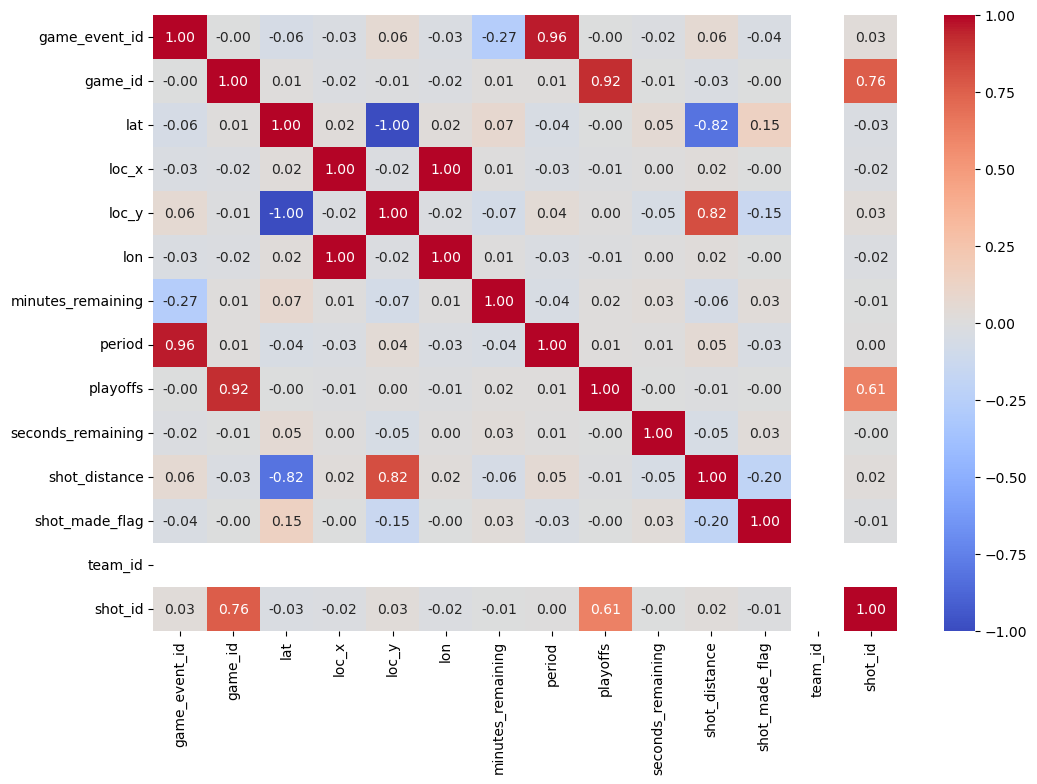

In [26]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Axes: xlabel='shot_distance', ylabel='shot_made_flag'>

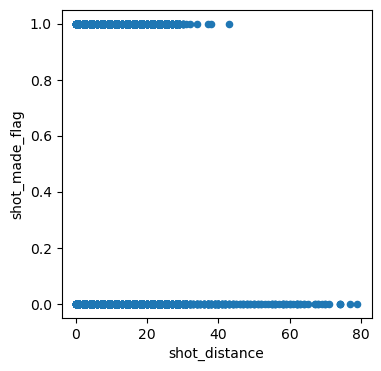

In [27]:
numerical_df.plot(kind='scatter', x='shot_distance', y='shot_made_flag', figsize=(4, 4))

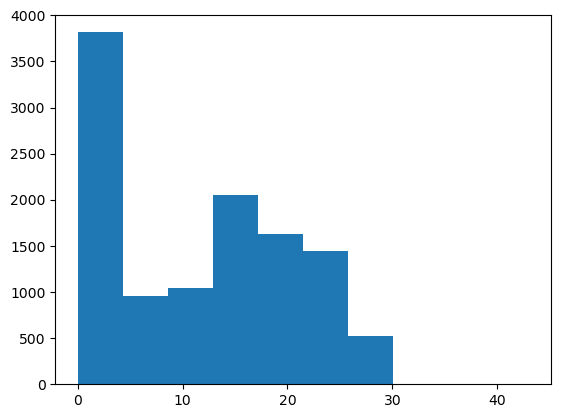

In [28]:
plt.hist(numerical_df[numerical_df['shot_made_flag'] == 1]['shot_distance'])  # Shots made by distance
plt.show()

<Axes: xlabel='playoffs', ylabel='game_id'>

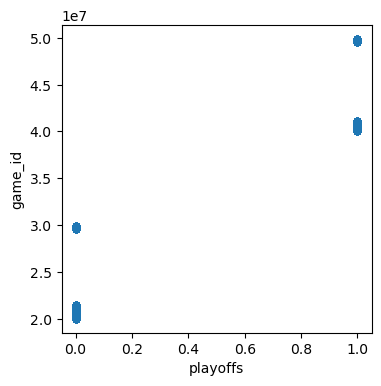

In [29]:
numerical_df.plot(kind='scatter', x='playoffs', y='game_id', figsize=(4, 4))

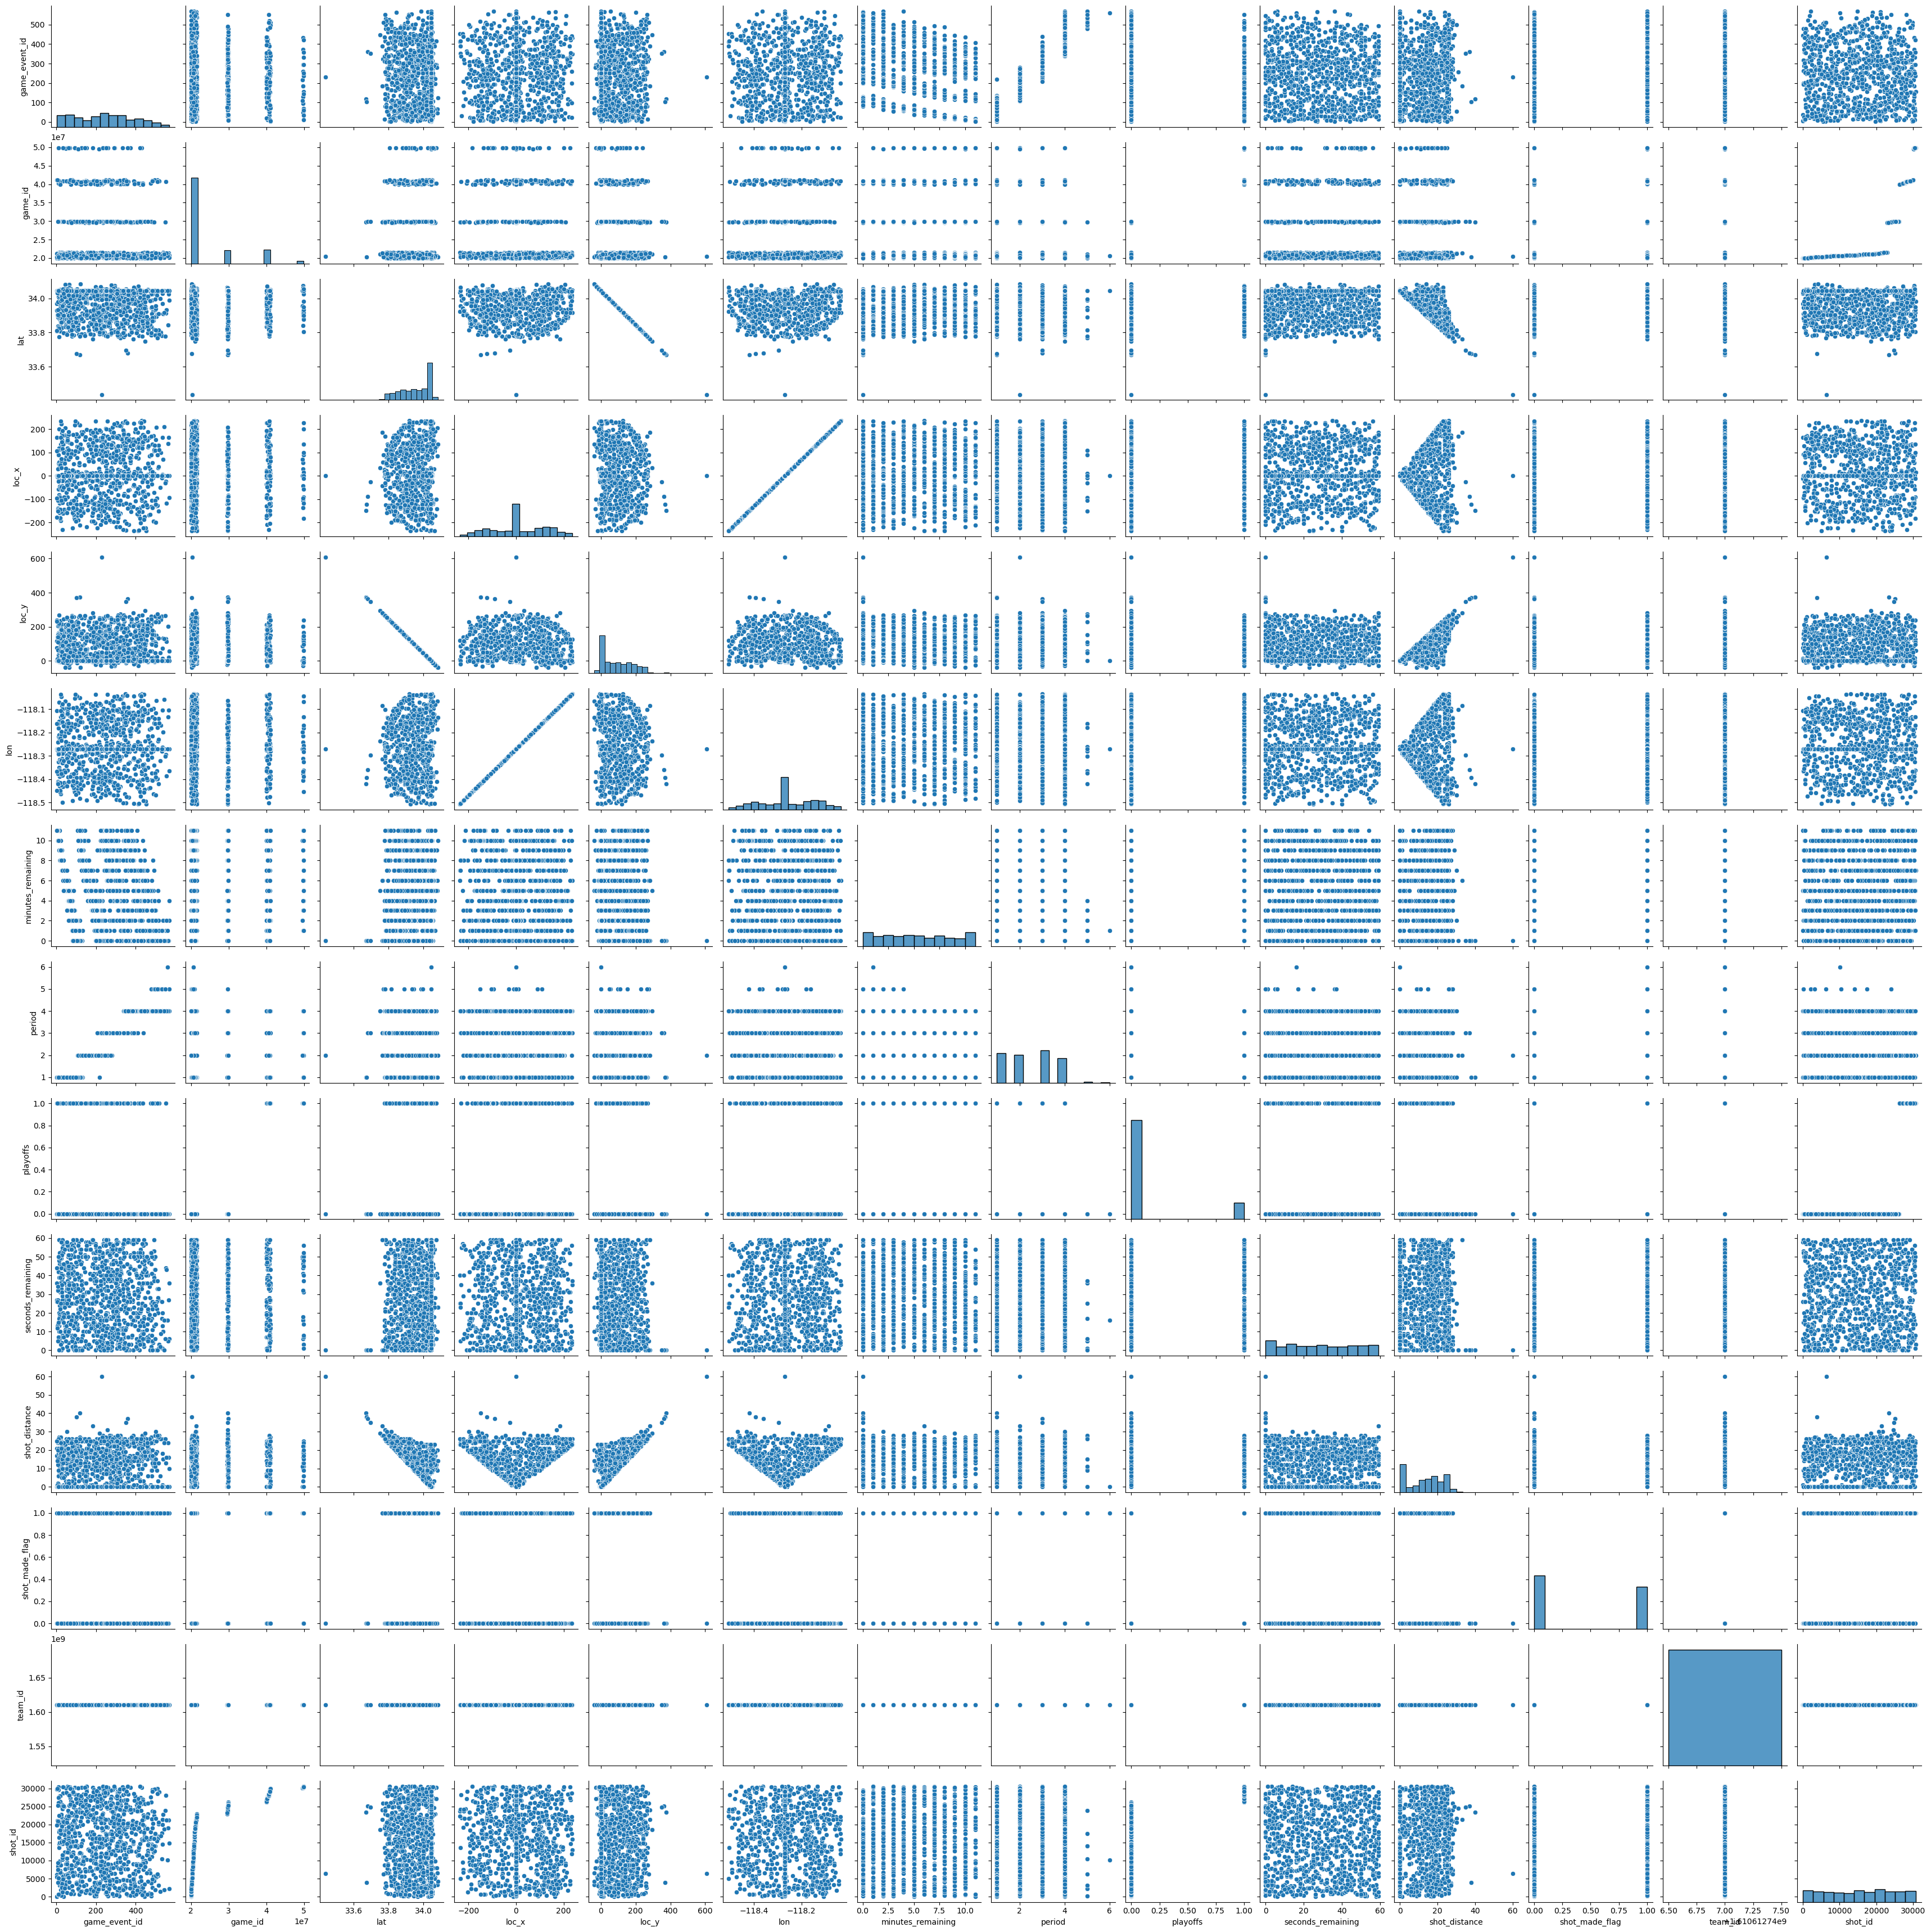

In [30]:
sns.pairplot(numerical_df.sample(n=1000))
plt.show()

> ### Bivariate Analysis - Categorical vs Categorical Data

In [31]:
categorical_df.columns

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'game_date', 'matchup', 'opponent'],
      dtype='object')

In [32]:
pd.crosstab(categorical_df['shot_zone_area'], categorical_df['shot_zone_range'])

shot_zone_range        16-24 ft.  24+ ft.  8-16 ft.  Back Court Shot  \
shot_zone_area                                                         
Back Court(BC)                 0        0         0               83   
Center(C)                   1197     1090      1770                0   
Left Side Center(LC)        1865     2179         0                0   
Left Side(L)                1257      280      2214                0   
Right Side Center(RC)       2437     2339         0                0   
Right Side(R)               1559      387      2642                0   

shot_zone_range        Less Than 8 ft.  
shot_zone_area                          
Back Court(BC)                       0  
Center(C)                         9398  
Left Side Center(LC)                 0  
Left Side(L)                         0  
Right Side Center(RC)                0  
Right Side(R)                        0

<Axes: xlabel='shot_zone_area'>

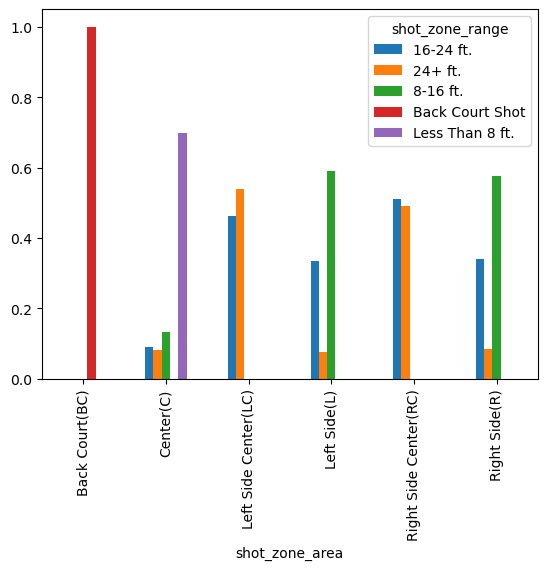

In [33]:
tab = pd.crosstab(categorical_df['shot_zone_area'], categorical_df['shot_zone_range'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='shot_zone_area'>

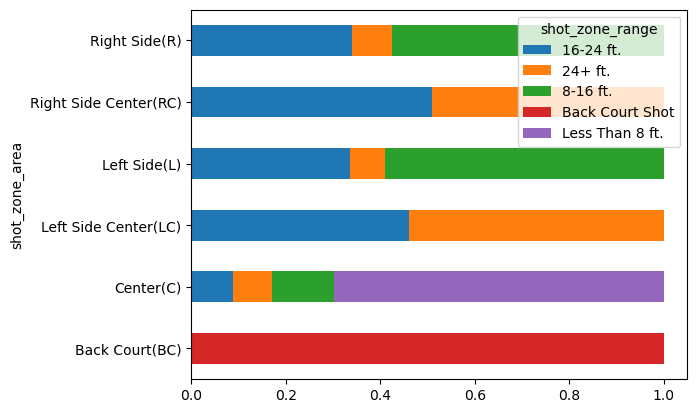

In [34]:
tab.plot(kind='barh', stacked=True)

In [35]:
pd.crosstab(categorical_df['combined_shot_type'], categorical_df['shot_type'])

shot_type           2PT Field Goal  3PT Field Goal
combined_shot_type                                
Bank Shot                      140               1
Dunk                          1286               0
Hook Shot                      153               0
Jump Shot                    17060            6425
Layup                         5448               0
Tip Shot                       184               0

<Axes: xlabel='combined_shot_type'>

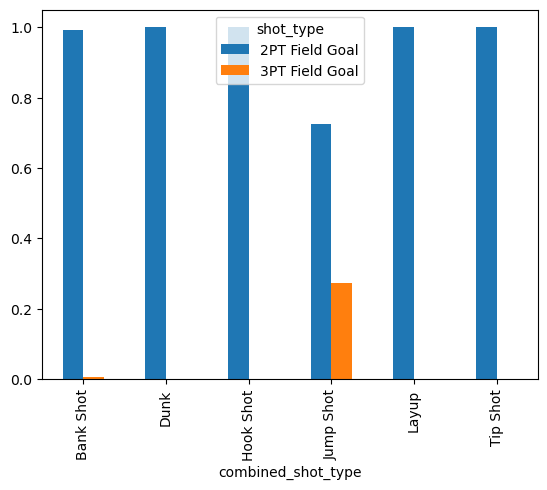

In [36]:
tab = pd.crosstab(categorical_df['combined_shot_type'], categorical_df['shot_type'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='combined_shot_type'>

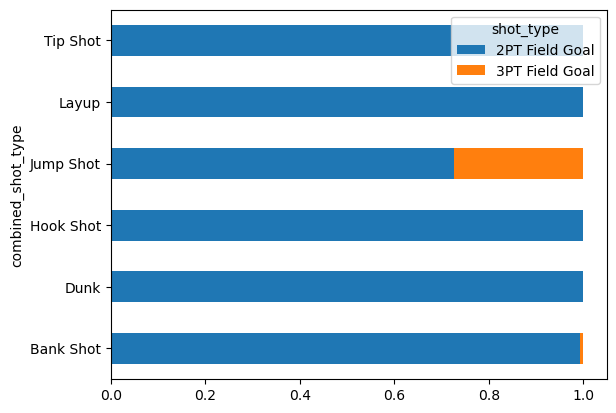

In [37]:
tab.plot(kind='barh', stacked=True)

> ### Bivariate Analysis - Numerical vs Categorical Data

In [38]:
shot_df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [39]:
group = shot_df.groupby('shot_type')

group['shot_made_flag'].agg(['min', 'max', 'mean', 'median'])

min  max      mean  median
shot_type                                 
2PT Field Goal  0.0  1.0  0.477348     0.0
3PT Field Goal  0.0  1.0  0.329268     0.0

<Axes: title={'center': 'shot_made_flag'}, xlabel='shot_type'>

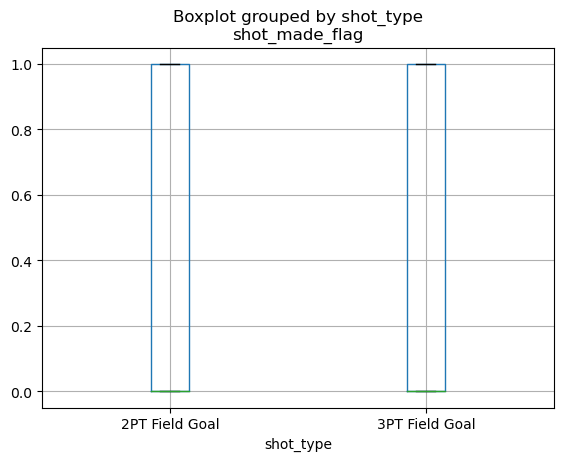

In [40]:
shot_df.boxplot(by='shot_type', column='shot_made_flag')

In [41]:
group = shot_df.groupby('combined_shot_type')

group['shot_made_flag'].agg(['min', 'max', 'mean', 'median'])

min  max      mean  median
combined_shot_type                            
Bank Shot           0.0  1.0  0.791667     1.0
Dunk                0.0  1.0  0.928030     1.0
Hook Shot           0.0  1.0  0.535433     1.0
Jump Shot           0.0  1.0  0.391071     0.0
Layup               0.0  1.0  0.565093     1.0
Tip Shot            0.0  1.0  0.348684     0.0

<Axes: title={'center': 'shot_made_flag'}, xlabel='combined_shot_type'>

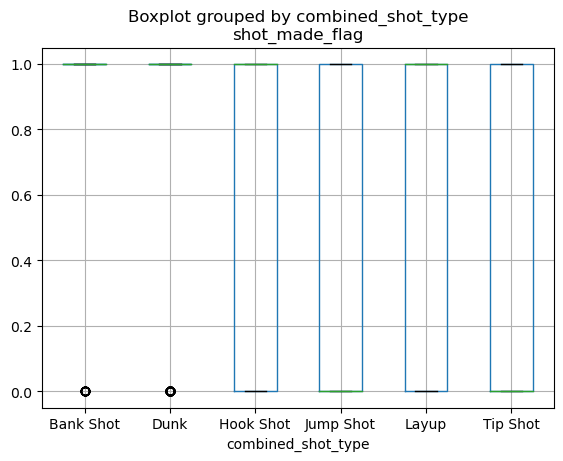

In [42]:
shot_df.boxplot(by='combined_shot_type', column='shot_made_flag')

# Data Preprocessing and Feature Engineering

In [43]:
# Convert data type
shot_df['game_date'] = pd.to_datetime(shot_df['game_date'])

shot_df.head()

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
0    167     72 -118.1028                 10       1         0  2000-01   
1   -157      0 -118.4268                 10       1         0  2000-01   
2   -101    135 -118.3708                  7       1         0  2000-01   
3    138    175 -118.1318                  6       1         0  2000-01   
4      0      0 -118.2698                  6       2         0  2000-01   

   seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                 27             18             NaN  2PT Field Goal   
1                 22             15             0.0  2PT Field Goal   
2                 45             16             1.0  2PT Field Goal   
3                 52             22             0.0  2PT Field Goal   
4                 19              0             1.0  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name  game_date    matchup opponent  shot_id  
0  Los Angeles Lakers 2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers 2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers 2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers 2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers 2000-10-31  LAL @ POR      POR        5

In [44]:
shot_df.isnull().sum().sort_values(ascending=False)

shot_made_flag        5000
action_type              0
shot_distance            0
opponent                 0
matchup                  0
game_date                0
team_name                0
team_id                  0
shot_zone_range          0
shot_zone_basic          0
shot_zone_area           0
shot_type                0
seconds_remaining        0
combined_shot_type       0
season                   0
playoffs                 0
period                   0
minutes_remaining        0
lon                      0
loc_y                    0
loc_x                    0
lat                      0
game_id                  0
game_event_id            0
shot_id                  0
dtype: int64

In [45]:
# Handling missing values
mean_value = shot_df['shot_made_flag'].mean()

shot_df['shot_made_flag'].fillna(mean_value, inplace=True)

In [46]:
shot_df['shot_made_flag'] = shot_df['shot_made_flag'].astype(int)

In [47]:
# Drop unnecessary columns
shot_df.drop(['game_event_id', 'game_id', 'lat', 'lon', 'team_id', 'team_name', 'season', 'game_date', 'matchup', 'shot_id'], 
        axis=1, inplace=True)

In [48]:
print(shot_df.shape)

shot_df.head()

(30697, 15)


action_type combined_shot_type  loc_x  loc_y  minutes_remaining  \
0          Jump Shot          Jump Shot    167     72                 10   
1          Jump Shot          Jump Shot   -157      0                 10   
2          Jump Shot          Jump Shot   -101    135                  7   
3          Jump Shot          Jump Shot    138    175                  6   
4  Driving Dunk Shot               Dunk      0      0                  6   

   period  playoffs  seconds_remaining  shot_distance  shot_made_flag  \
0       1         0                 27             18               0   
1       1         0                 22             15               0   
2       1         0                 45             16               1   
3       1         0                 52             22               0   
4       2         0                 19              0               1   

        shot_type         shot_zone_area  shot_zone_basic  shot_zone_range  \
0  2PT Field Goal          Right Side(R)        Mid-Range        16-24 ft.   
1  2PT Field Goal           Left Side(L)        Mid-Range         8-16 ft.   
2  2PT Field Goal   Left Side Center(LC)        Mid-Range        16-24 ft.   
3  2PT Field Goal  Right Side Center(RC)        Mid-Range        16-24 ft.   
4  2PT Field Goal              Center(C)  Restricted Area  Less Than 8 ft.   

  opponent  
0      POR  
1      POR  
2      POR  
3      POR  
4      POR

In [49]:
from sklearn.preprocessing import OneHotEncoder

# Converting categorical variables to numerical using one-hot encoding
categorical_cols = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
                    'shot_zone_range', 'opponent']

# One-hot encode categorical variables
shot_df = pd.get_dummies(shot_df, columns=categorical_cols)

In [50]:
print(shot_df.shape)

shot_df.head()

(30697, 124)


loc_x  loc_y  minutes_remaining  period  playoffs  seconds_remaining  \
0    167     72                 10       1         0                 27   
1   -157      0                 10       1         0                 22   
2   -101    135                  7       1         0                 45   
3    138    175                  6       1         0                 52   
4      0      0                  6       2         0                 19   

   shot_distance  shot_made_flag  action_type_Alley Oop Dunk Shot  \
0             18               0                            False   
1             15               0                            False   
2             16               1                            False   
3             22               0                            False   
4              0               1                            False   

   action_type_Alley Oop Layup shot  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   

   action_type_Cutting Finger Roll Layup Shot  action_type_Cutting Layup Shot  \
0                                       False                           False   
1                                       False                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   action_type_Driving Bank shot  action_type_Driving Dunk Shot  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                           True   

   action_type_Driving Finger Roll Layup Shot  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   action_type_Driving Finger Roll Shot  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   action_type_Driving Floating Bank Jump Shot  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   action_type_Driving Floating Jump Shot  action_type_Driving Hook Shot  \
0                                   False                          False   
1                                   False                          False   
2                                   False                          False   
3                                   False                          False   
4                                   False                          False   

   action_type_Driving Jump shot  action_type_Driving Layup Shot  \
0                          False                           False   
1                          False                           False   
2                          False                           False   
3                          False                           False   
4                          False                           False   

   action_type_Driving Reverse Layup Shot  action_type_Driving Slam Dunk Shot  \
0                                   False                               False   
1                                   False                               False   
2                                   False       

# ML Model Building

## Identifying Inputs and Output

In [51]:
X = shot_df.drop(['shot_made_flag'], axis=1)

y = shot_df['shot_made_flag']

## Split data into train and test sets

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(24557, 123) (24557,)
(6140, 123) (6140,)


## Balancing the Data and Data preprocessing on X_train and X_test data

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [54]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [55]:
# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_resampled)

X_test_scaled = scaler.transform(X_test)

## Train and Evaluate the model

> ### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6933224755700326
F1_Score: 0.49826805222488674


> ### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.5765472312703583
F1_Score: 0.4500846023688663


> ### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6498371335504886
F1_Score: 0.4844124700239808


> ### SVM

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svm_model = SVC(random_state=42)

svm_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6874592833876222
F1_Score: 0.47952264713859505


> ### Bagging

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

bag_model = BaggingClassifier(random_state=42)

bag_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = bag_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6283387622149837
F1_Score: 0.42778335005015045


> ### Gradient Boost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6820846905537459
F1_Score: 0.5347950428979981


> ### Ada Boost

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

ab_model = AdaBoostClassifier(random_state=42)

ab_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = ab_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6804560260586319
F1_Score: 0.5075301204819277


> ### XGBoost

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_scaled, y_resampled)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6713355048859935
F1_Score: 0.49725959142999504


## ML Model

In [64]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV

In [65]:
import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [66]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'bagging': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', BaggingClassifier())
    ], memory=memory),
    'gradient_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier())
    ], memory=memory),
    'ada_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier())
    ], memory=memory),
    'xg_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

In [67]:
# Define parameter grid for each algorithm
param_grids = {
    'logistic_regression': [
        {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced', None]
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 3, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'bagging': [
        {
            'classifier__base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=10)],
            'classifier__n_estimators': [10, 50, 100, 200]
        }
    ],
    'gradient_boost': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]        }
    ],
    'ada_boost': [
        {
            'classifier__base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
        }
    ],
    'xg_boost': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]        }
    ]
}

In [68]:
# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*15, algo, "*"*15)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    # Ensure to have a split dataset
    %time grid_search.fit(X_train_scaled, y_resampled)

    best_models[algo] = grid_search.best_estimator_
    
    print('Test Score: ', grid_search.score(X_test_scaled, y_test))
    print()

*************** logistic_regression ***************
Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 21min 44s
Wall time: 22min 1s
Test Score:  0.5160627088152147

*************** decision_tree ***************
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: total: 24.6 s
Wall time: 25.3 s
Test Score:  0.494168808064835

*************** random_forest ***************
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 32min 53s
Wall time: 34min 18s
Test Score:  0.4995269631031221

*************** bagging ***************
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 7min 54s
Wall time: 8min 20s
Test Score:  0.5179145045712874

*************** gradient_boost ***************
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 35min 44s
Wall time: 37min 37s
Test Score:  0.5280271778694492

*************** ada_boost ***************
Fitting 5 folds for 

In [69]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    l1_ratio=0.8, penalty='elasticnet',
                                    solver='saga'))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=20))])

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=30, n_estimators=500))])

bagging
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10)))])

gradient_boost
Pipeline(memory=Memory(l